In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random

In [9]:
filehandle = 'ProjectData/daily_dataset.csv/daily_dataset.csv'

daily_data = pd.read_csv(filehandle)
daily_data.shape

(3510433, 9)

# Dataset is quite large, with 3510433 lines
There are 5566 unique smart meters, with 829 days in the dataset. 
Therefore, lets pick at random 1000 mac id's, and for EDA start with one year. Before taking subsamples check wheter there are NaN values

In [10]:
print (len(daily_data.LCLid.unique()))
print (len(daily_data.day.unique()))

5566
829


In [11]:
daily_data.isnull().any() # some missing values in a few columns, how many and possible to drop?

LCLid            False
day              False
energy_median     True
energy_mean       True
energy_max        True
energy_count     False
energy_std        True
energy_sum        True
energy_min        True
dtype: bool

In [12]:
daily_data.isnull().sum() # just 30 in most columns, std dev is kindoff concerning with 11k missing 

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [13]:
# decision is to drop the nan stdev for now each entry (row) is a day, so we will lose some days
daily_data = daily_data.dropna(axis = 0 ) # remove entire row
daily_data.isnull().sum() # worked

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64

In [125]:
# Plot below in cell below is better :)


# # lets now filter per year (most recent with all data is 2013) and take a sample of 1000 id's
# year = '2013'
# daily_sub = daily_data.loc[daily_data.day.str.contains(year)] # take only data where colum day contains 2013 in this case

# # now 365 in dataset, shape is still quite big with 5528 entries
# len(daily_sub.LCLid.unique())

# # take one random MAC
# sample_mac = random.choice(daily_sub.LCLid.unique())

# sample = daily_sub.loc[daily_sub['LCLid'] == sample_mac]

# sns.lineplot(y= sample.energy_mean, x = sample.day) # not very insight full tbh



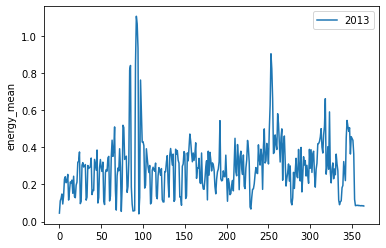

In [130]:
# you could run the cell and get for different meters different data
sample_mac = random.choice(daily_sub.LCLid.unique())
sample = daily_data.loc[daily_data.LCLid == sample_mac]

covered_years = ['2011','2012','2013','2014']


for year in covered_years:
    # select only the year and plot it 
    df = sample.loc[sample.day.str.contains(year)]
    days = [x for x in range (len(df.index))]
    
    sns.lineplot(x = days, y = df.energy_mean, label = year)
plt.legend()
    

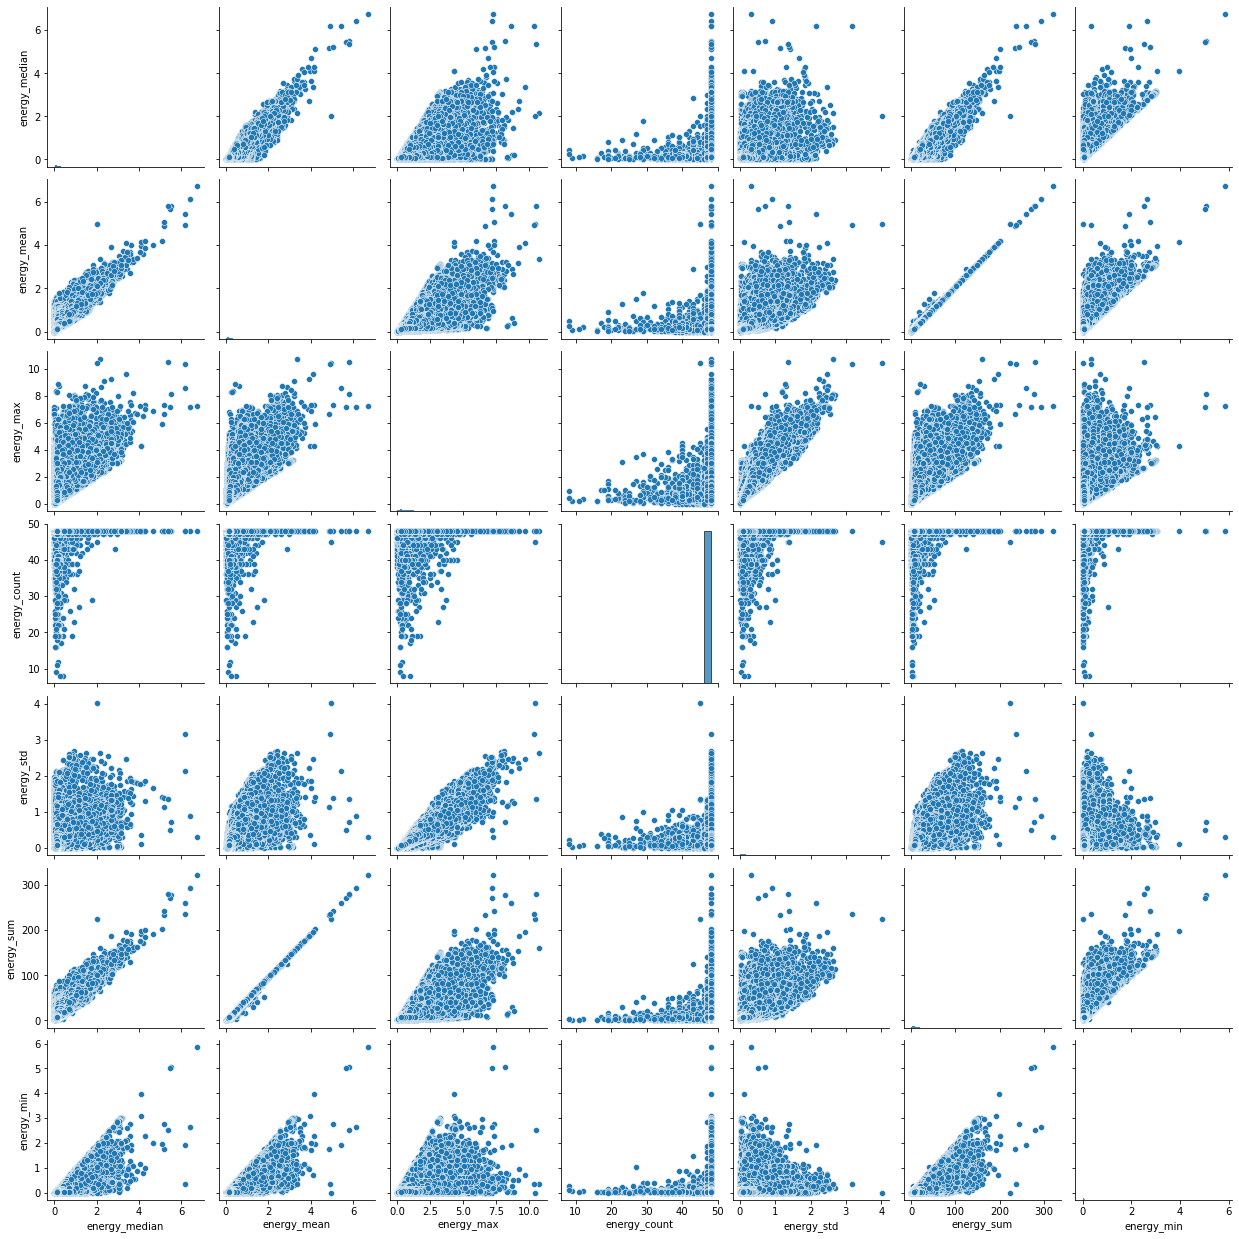

In [51]:
sns.pairplot(daily_sub) # takes long to run watch out

# Energy stuff is quite closely related to each other, I will now try to match weather data and check correlations there. -> perhaps we could aggregate energy data

In [85]:
filehandle = 'ProjectData/weather_daily_darksky.csv'
weather_data= pd.read_csv(filehandle)
weather_data.columns # date is a little hidden?


Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [86]:
weather_data

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0             11.96  2011-11-11 23:00:00          123                  fog   
1              8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2             10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3              8.07  2011-12-02 23:00:00          232                 wind   
4              8.22  2011-12-24 23:00:00          252  partly-cloudy-night   
..              ...                  ...          ...                  ...   
877            9.03  2014-01-26 16:00:00          233    partly-cloudy-day   
878           10.31  2014-02-27 14:00:00          224    partly-cloudy-day   
879           18.97  2014-03-09 14:00:00          172  partly-cloudy-night   
880            8.83  2014-02-12 16:00:00          210                 wind   
881            9.90  2014-02-15 12:00:00          233                 wind   

     dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0        9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1        4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2        5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3        3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4        2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   
..        ...                  ...         ...        ...       ...   
877      2.39  2014-01-26 21:00:00        0.40       4.55   1002.10   
878      3.08  2014-02-27 23:00:00        0.32       4.14   1007.02   
879      4.30  2014-03-09 07:00:00        0.04       2.78   1022.44   
880      1.94  2014-02-12 01:00:00        0.59       7.24    994.27   
881      2.95  2014-02-15 23:00:00        0.35       9.96    988.63   

    apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0          2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1          2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2          2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3          2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4          2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   
..                         ...  ...              ...                  ...   
877        2014-01-26 22:00:00  ...             9.03  2014-01-26 07:48:49   
878        2014-02-27 22:00:00  ...            10.31  2014-02-27 06:51:45   
879        2014-03-09 07:00:00  ...            18.97  2014-03-09 06:29:49   
880        2014-02-12 01:00:00  ...             8.83  2014-02-12 07:21:44   
881        2014-02-15 23:00:00  ...             9.90  2014-02-15 07:16:06   

     temperatureHighTime          uvIndexTime  \
0    2011-11-11 19:00:00  2011-11-11 11:00:00   
1    2011-12-11 14:00:00  2011-12-11 12:00:00   
2    2011-12-27 14:00:00  2011-12-27 00:00:00   
3    2011-12-02 12:00:00  2011-12-02 10:00:00   
4    2011-12-24 15:00:00  2011-12-24 13:00:00   
..                   ...                  ...   
877  2014-01-26 16:00:00  2014-01-26 11:00:00   
878  2014-02-27 14:00:00  2014-02-27 12:00:00   
879  2014-03-09 14:00:00  2014-03-09 12:00:00   
880  2014-02-12 16:00:00  2014-02-12 10:00:00   
881  2014-02-15 12:00:00  2014-02-15 10:00:00   

                                               summary   temperatureLowTime  \
0                               Foggy until afternoon.  2011-11-11 19:00:00   
1                    Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                    Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3    Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                    Mostly cloudy throughout the day.  2011-12-24 19:00:00   
..                                                 ...                  ...   
877                       Mostly cloudy until evening.  2014-01-27 05:00:00   
878                       Partly cloudy until evening.  2014-02-28 02

In [89]:
type(weather_data.sunriseTime[1])

str

In [92]:
# idea; take 2013 (most data available) of each day in 2013 take average energy_mean of daily_data (take all MAC ideas) plot this in pairplot

year = '2013'

weather_subselect = weather_data.loc[weather_data.sunriseTime.str.contains(year)]
weather_subselect.describe()



temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      365.000000   365.000000  365.000000  365.000000  365.000000   
mean        14.023233   187.465753    6.521863    0.492521    3.545753   
std          7.070725    98.224329    5.482353    0.203047    1.697561   
min         -0.060000     0.000000   -5.540000    0.030000    0.400000   
25%          8.810000    87.000000    2.250000    0.360000    2.300000   
50%         13.700000   216.000000    6.920000    0.480000    3.440000   
75%         19.350000   257.000000   10.680000    0.620000    4.470000   
max         32.400000   359.000000   17.610000    1.000000    8.910000   

          pressure  apparentTemperatureHigh  visibility    humidity  \
count   365.000000               365.000000  365.000000  365.000000   
mean   1015.217342                12.979945   11.180493    0.766438   
std       9.998691                 8.329441    2.502815    0.102055   
min     979.520000                -6.460000    1.930000    0.430000   
25%    1009.250000                 6.340000   10.170000    0.690000   
50%    1015.570000                13.490000   11.910000    0.770000   
75%    1022.240000                19.230000   12.810000    0.850000   
max    1038.710000                32.420000   15.340000    0.960000   

       apparentTemperatureLow  apparentTemperatureMax     uvIndex  \
count              365.000000              365.000000  365.000000   
mean                 6.409068               13.213452    2.684932   
std                  6.650589                8.119065    1.820795   
min                 -8.880000               -4.110000    0.000000   
25%                  0.710000                6.980000    1.000000   
50%                  6.280000               13.700000    2.000000   
75%                 12.230000               19.350000    4.000000   
max                 19.640000               32.420000    7.000000   

       temperatureLow  temperatureMin  temperatureHigh  \
count      365.000000      365.000000       365.000000   
mean         7.957288        7.686438        13.887315   
std          5.333888        5.366684         7.165284   
min         -3.860000       -3.860000        -0.810000   
25%          3.020000        2.870000         8.560000   
50%          8.190000        7.840000        13.490000   
75%         12.230000       12.160000        19.230000   
max         19.290000       19.290000        32.400000   

       apparentTemperatureMin   moonPhase  
count              365.000000  365.000000  
mean                 6.095863    0.507671  
std                  6.677857    0.290362  
min                 -8.880000    0.000000  
25%                  0.390000    0.250000  
50%                  5.780000    0.520000  
75%                 12.160000    0.760000  
max                 19.640000    0.990000

In [116]:
weather_subselect = weather_subselect.select_dtypes(include = np.number) # for now remove categorical data

# selecting 2013 then averaging per day to end up with 365, for cols max,min, mean and std
year_data = daily_data.loc[daily_data.day.str.contains(year)]
days = daily_data.day.unique()
cols = ['mean', 'max', 'min', 'std']
cols = ['energy_'+x for x in cols]

averages = pd.DataFrame(columns=cols)


for day_num,day_i in enumerate(days):
    day_data = year_data.loc[year_data.day ==day_i]
    
    for col_j in cols:
        averages.at[day_num,col_j] = day_data[col_j].mean()
    
    
averages






energy_mean energy_max energy_min energy_std
0      0.246831   0.907364   0.065123   0.193632
1      0.250471    0.92859    0.06546   0.198726
2      0.237537   0.909334   0.062354   0.192529
3      0.238099   0.920317    0.06219   0.194215
4      0.244102   0.921368   0.063241   0.195247
..          ...        ...        ...        ...
360    0.243176   0.877303   0.065719   0.187202
361     0.23722   0.877959   0.065015   0.186336
362     0.24955   0.921353   0.065948   0.198367
363    0.246625   0.908655   0.064776   0.193557
364    0.248505   0.915958   0.064755   0.195751

[365 rows x 4 columns]

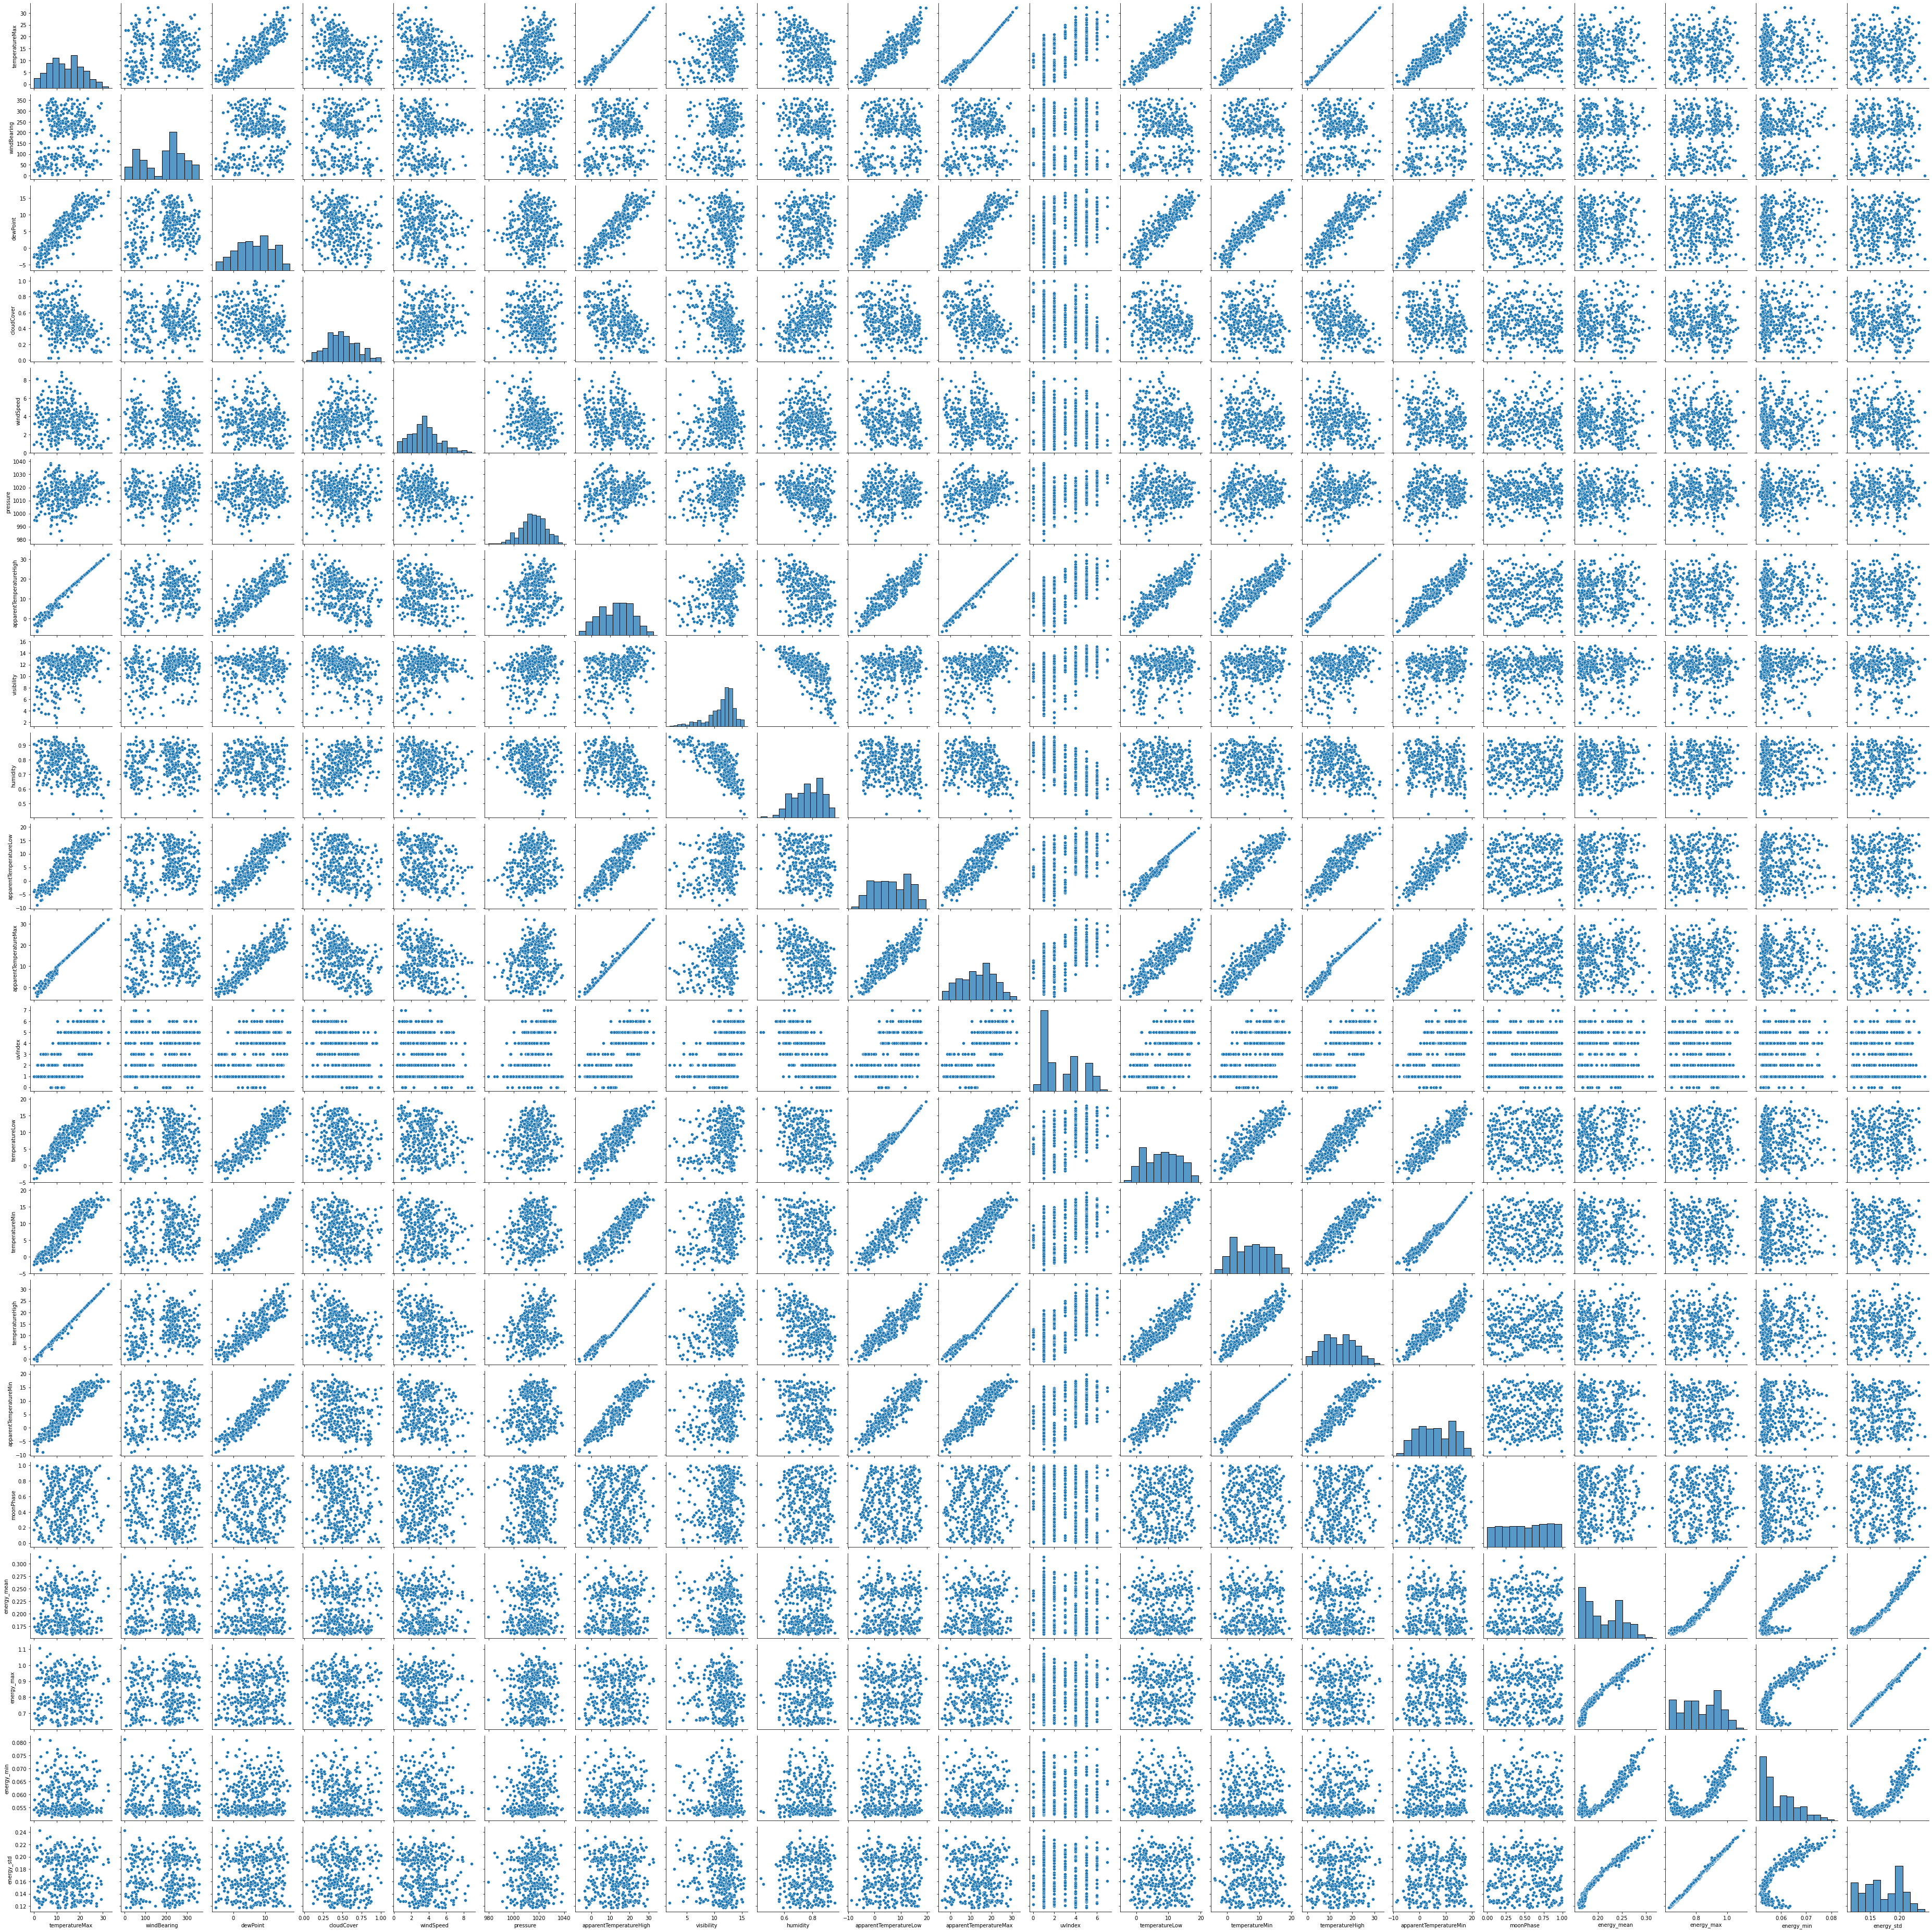

In [123]:
# join the two


sns.pairplot(weather_subselect.join(averages, on=averages.index))

# should subselect but ran out of time


In [124]:
plt.savefig('pairplot.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='day', ylabel='energy_mean'>

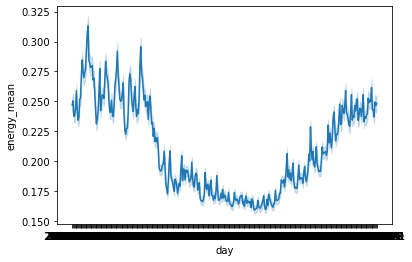

In [136]:

sns.lineplot(y = year_data.energy_mean, x = year_data.day)